# **DRUG CLASSIFICATION**
### Using models:
### 1. Support Vector Machine (SVM) - ADASYN (oversampling)
### 2. Decission Tree - ADASYN (oversampling)
### 3. Support Vector Machine (SVM) - SMOTE + Tomek Link (gabungan)
### 4. Decission Tree -  SMOTE + Tomek Link (gabungan)

### A] Preprocessing data
</br>A.1.Import data asli, diketahui data Drug200 imbalanced

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# import dataset drug200
data_drug = pd.read_excel('drug200.xlsx')
data_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,Y
1,47,M,LOW,HIGH,13.093,C
2,47,M,LOW,HIGH,10.114,C
3,28,F,NORMAL,HIGH,7.798,X
4,61,F,LOW,HIGH,18.043,Y
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,C
196,16,M,LOW,HIGH,12.006,C
197,52,M,NORMAL,HIGH,9.894,X
198,23,M,NORMAL,NORMAL,14.020,X


In [2]:
# menampilkan informasi dataset
data_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
# statistik deskriptif untuk data numerik
numeric_stats = data_drug.describe()
print(f'Statistic Deskriptif data numerik:')
numeric_stats

Statistic Deskriptif data numerik:


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


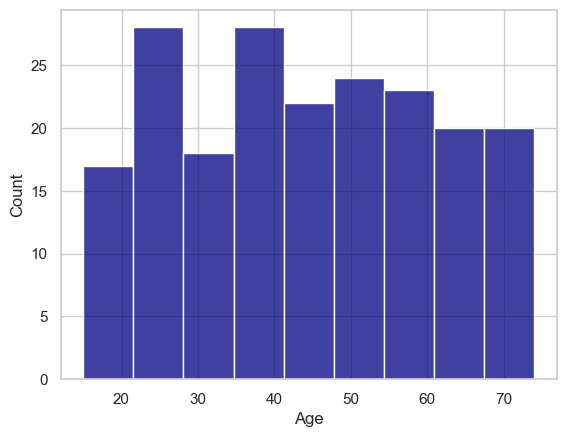

In [4]:
# visualisasi histogram data numerik
sns.set(style="whitegrid")
sns.histplot(data=data_drug, x=data_drug['Age'], color="navy")
plt.show()

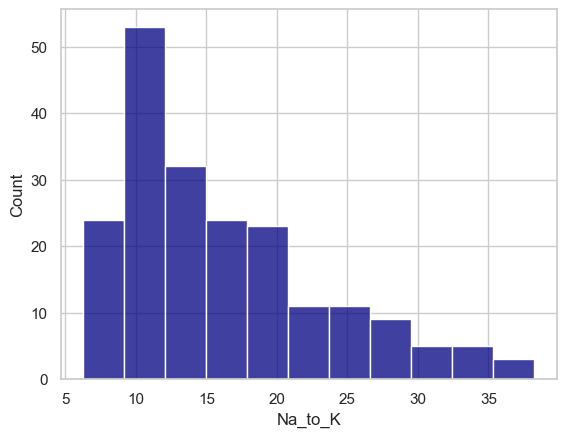

In [5]:
sns.set(style="whitegrid")
sns.histplot(data=data_drug, x=data_drug['Na_to_K'], color="navy")
plt.show()

In [6]:
# Statistik deskriptif untuk data kategorikal
categorical_stats = data_drug.describe(include=['object'])
frequency_stats = {col: data_drug[col].value_counts() for col in data_drug.select_dtypes(include=['object']).columns}

print("Statistik Deskriptif Kategorikal:")
print(categorical_stats)
print("\nFrekuensi Setiap Kategori:")
for col, freq in frequency_stats.items():
    print(f"\nFrekuensi untuk {col}:")
    print(freq)

Statistik Deskriptif Kategorikal:
        Sex    BP Cholesterol Drug
count   200   200         200  200
unique    2     3           2    5
top       M  HIGH        HIGH    Y
freq    104    77         103   91

Frekuensi Setiap Kategori:

Frekuensi untuk Sex:
Sex
M    104
F     96
Name: count, dtype: int64

Frekuensi untuk BP:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Frekuensi untuk Cholesterol:
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Frekuensi untuk Drug:
Drug
Y    91
X    54
A    23
C    16
B    16
Name: count, dtype: int64


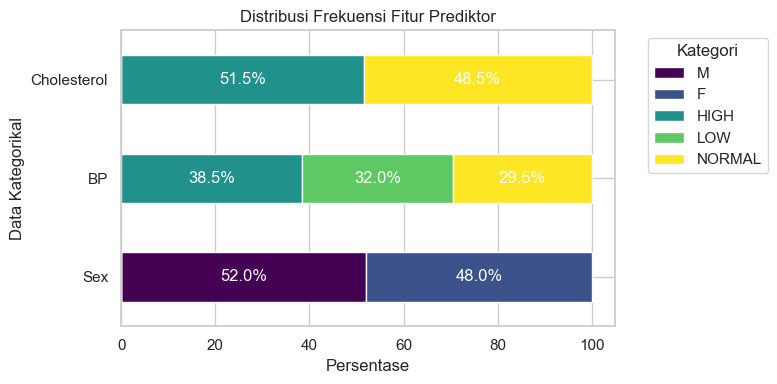

In [7]:
# visualisasi distribusi frekuensi data kategorikal (prediktor)
frek_predictor = pd.DataFrame({
    'Sex': {'M': 104, 'F': 96},
    'BP': {'HIGH': 77, 'LOW': 64, 'NORMAL': 59},
    'Cholesterol': {'HIGH': 103, 'NORMAL': 97}
})

df_percent = frek_predictor.div(frek_predictor.sum(axis=0), axis=1) * 100
fig, ax = plt.subplots(figsize=(8, 4))
df_percent.T.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
for i, feature in enumerate(df_percent.columns):
    for j, (category, value) in enumerate(df_percent[feature].items()):
        if value > 0:
            ax.text(value / 2 + df_percent[feature][:j].sum(), i, f'{value:.1f}%', ha='center', va='center', color='white')

ax.set_title('Distribusi Frekuensi Fitur Prediktor')
ax.set_xlabel('Persentase')
ax.set_ylabel('Data Kategorikal')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A.2.Menghitung persentase jumlah data masing-masing kategori target
</br>Menampilkan distribusi frekuensi fitur target

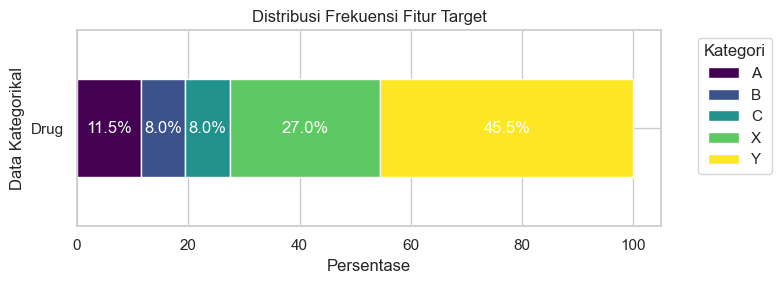

In [8]:
# visualisasi distribusi frekuensi data kategorikal (target)
frek_target = pd.DataFrame({'Drug': {'A': 23, 'B': 16, 'C': 16, 'X': 54, 'Y': 91}})
df_percent = frek_target.div(frek_target.sum(axis=0), axis=1) * 100
fig, ax = plt.subplots(figsize=(8, 3))
df_percent.T.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
for i, feature in enumerate(df_percent.columns):
    for j, (category, value) in enumerate(df_percent[feature].items()):
        if value > 0:
            ax.text(value / 2 + df_percent[feature][:j].sum(), i, f'{value:.1f}%', ha='center', va='center', color='white')

ax.set_title('Distribusi Frekuensi Fitur Target')
ax.set_xlabel('Persentase')
ax.set_ylabel('Data Kategorikal')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A.3.Melakukan encoding data kategorikal

In [9]:
df_drug = data_drug.copy()
le_Sex = LabelEncoder()
le_BP = LabelEncoder()
le_Choslestrol = LabelEncoder()
le_Drug = LabelEncoder()

df_drug["Sex"] = le_Sex.fit_transform(df_drug["Sex"])
df_drug["BP"] = le_BP.fit_transform(df_drug["BP"])
df_drug["Cholesterol"] = le_Choslestrol.fit_transform(df_drug["Cholesterol"])
df_drug["Drug"] = le_Drug.fit_transform(df_drug["Drug"])
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [10]:
# Split prediktor (X) dengan target (y)
X = df_drug.drop(columns=["Drug"])  
y = df_drug["Drug"] 

In [11]:
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=1)

In [12]:
# menampilkan transkrip label kategori target
drug_kategori = dict(zip(le_Drug.classes_, range(len(le_Drug.classes_))))
print(drug_kategori)

{'A': 0, 'B': 1, 'C': 2, 'X': 3, 'Y': 4}


C:\Users\Asus\AppData\Local\Temp\ipykernel_5160\184192076.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=kategori_counts.index, y=kategori_counts, palette=np.array(color_pal[::-1])[rank], hue=kategori_counts.index)


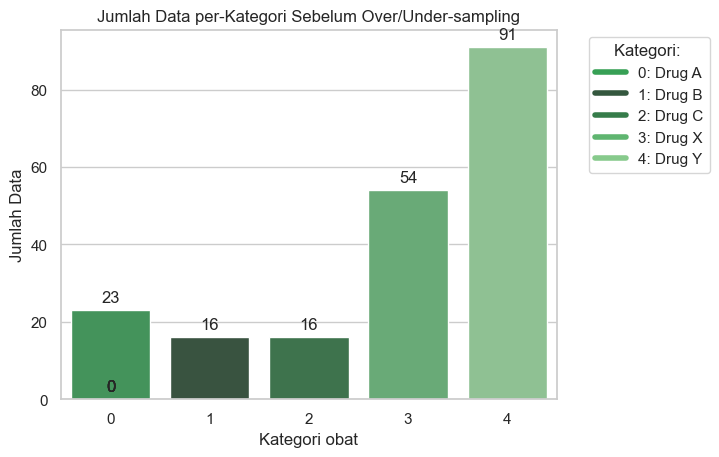

In [13]:
# Visualisasi distribusi target sebelum Over/Under-sampling
kategori_counts = y.value_counts().sort_index()

sns.set(style="whitegrid", color_codes=True)
color_pal = sns.color_palette("Greens_d", len(kategori_counts))
rank = kategori_counts.argsort().argsort()
ax = sns.barplot(x=kategori_counts.index, y=kategori_counts, palette=np.array(color_pal[::-1])[rank], hue=kategori_counts.index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

legend_labels = ['0: Drug A', '1: Drug B', '2: Drug C', '3: Drug X', '4: Drug Y']
lines = [Line2D([0], [0], color=np.array(color_pal[::-1])[rank][i], lw=4) for i in range(len(legend_labels))]
plt.legend(lines, legend_labels, title="Kategori: ", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Jumlah Data per-Kategori Sebelum Over/Under-sampling')
plt.xlabel('Kategori obat')
plt.ylabel('Jumlah Data')
plt.show()

### B] Klasifikasi data hasil resampling oversampling menggunakan teknik ADASYN
</br>B.1.Melakukan resampling menggunakan teknik oversampling ADASYN

In [14]:
from imblearn.over_sampling import ADASYN
                
# Menerapkan ADASYN untuk oversampling kelas minoritas
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X, y) 

# Menampilkan jumlah df_drug setelah oversampling ADASYN
print("Sebelum ADASYN:",  pd.Series(y).value_counts())
print("Setelah ADASYN:",  pd.Series(y_adasyn).value_counts())

Sebelum ADASYN: Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64
Setelah ADASYN: Drug
3    98
2    92
4    91
1    91
0    89
Name: count, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_5160\2706659565.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=adasyn_counts.index, y=adasyn_counts, palette=np.array(color_pal[::-1])[rank], hue=adasyn_counts.index)


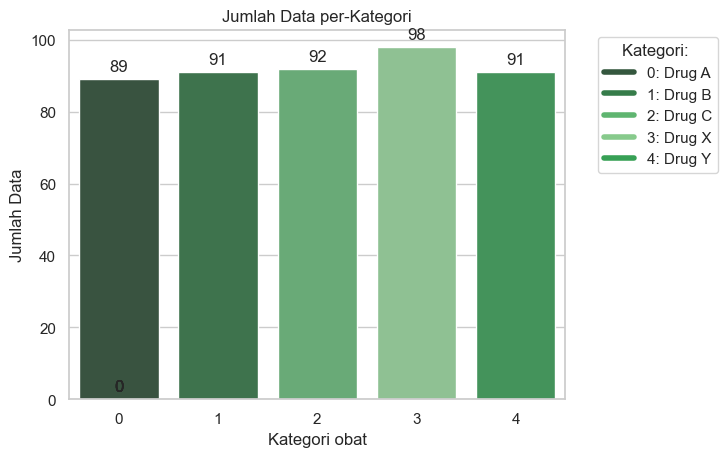

In [15]:
# Visualisasi distribusi target setelah oversampling ADASYN
adasyn_counts = y_adasyn.value_counts().sort_index()

sns.set(style="whitegrid", color_codes=True)
color_pal = sns.color_palette("Greens_d", len(adasyn_counts))
rank = adasyn_counts.argsort().argsort() 
ax = sns.barplot(x=adasyn_counts.index, y=adasyn_counts, palette=np.array(color_pal[::-1])[rank], hue=adasyn_counts.index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

legend_labels = ['0: Drug A', '1: Drug B', '2: Drug C', '3: Drug X', '4: Drug Y']
lines = [Line2D([0], [0], color=np.array(color_pal[::-1])[rank][i], lw=4) for i in range(len(legend_labels))]
plt.legend(lines, legend_labels, title="Kategori: ", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Jumlah Data per-Kategori')
plt.xlabel('Kategori obat')
plt.ylabel('Jumlah Data')
plt.show()

In [16]:
# Membagi data hasil oversampling ADASYN (train:80% dan test:20%)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn,
                                                                                y_adasyn,
                                                                                test_size=0.2,
                                                                                random_state=1)

</br> B.2.Klasifikasi menggunakan metode Support Vector Mechine (SVM)

In [17]:
# training data menggunakan model SVM
from sklearn.svm import SVC

model_adasyn_svm= SVC()
model_adasyn_svm.fit(X_train_adasyn, y_train_adasyn)
y_predict_adasyn_svm= model_adasyn_svm.predict(X_test_adasyn)

In [18]:
# Evaluasi model_svm
cls_report_svm_adasyn = classification_report(y_test_adasyn, y_predict_adasyn_svm)
print(f'Classification Report Model SVM-smote: \n{cls_report_svm_adasyn}')

Classification Report Model SVM-smote: 
              precision    recall  f1-score   support

           0       0.41      0.94      0.57        16
           1       0.68      1.00      0.81        26
           2       0.00      0.00      0.00        16
           3       0.40      0.11      0.17        19
           4       1.00      0.81      0.90        16

    accuracy                           0.60        93
   macro avg       0.50      0.57      0.49        93
weighted avg       0.51      0.60      0.51        93



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

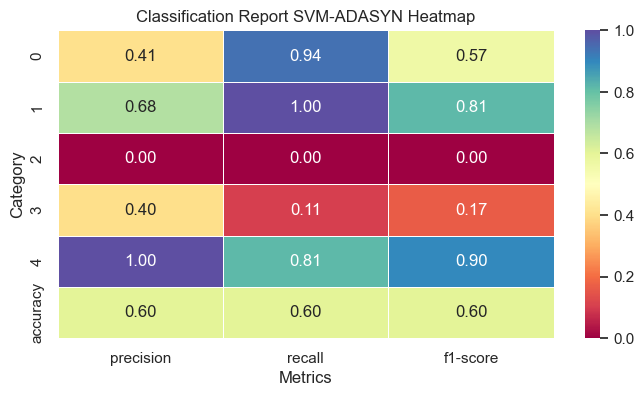

In [19]:
# Dapatkan classification report_adasyn_svm
report_adasyn_svm = pd.DataFrame(classification_report(y_test_adasyn, y_predict_adasyn_svm, output_dict=True)).transpose()
plt.figure(figsize=(8, 4))
sns.heatmap(report_adasyn_svm.iloc[:-2, :3], annot=True, cmap='Spectral', fmt='.2f', linewidths=.5)
plt.title('Classification Report SVM-ADASYN Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Category')
plt.show()

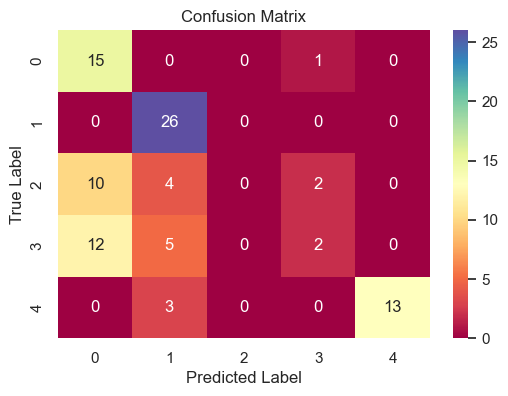

In [20]:
# Visualisasi confusion matrix
matrix_adasyn_svm = confusion_matrix(y_test_adasyn, y_predict_adasyn_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_adasyn_svm, annot=True, fmt='d', cmap='Spectral', cbar=True,
            xticklabels=np.unique(y_test_adasyn),
            yticklabels=np.unique(y_test_adasyn))

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

</br> B.3.Klasifikasi menggunakan metode Decision Tree

In [21]:
# Training data menggunakan Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_adasyn_decTree=DecisionTreeClassifier()
model_adasyn_decTree.fit(X_train_adasyn,y_train_adasyn)
y_predict_adasyn_decTree=model_adasyn_decTree.predict(X_test_adasyn)

In [22]:
# Evaluasi 
cls_report_decTree_adasyn = classification_report(y_test_adasyn, y_predict_adasyn_decTree)
print(f'Classification Report Model Decision Tree-smote:: \n{cls_report_decTree_adasyn}')

Classification Report Model Decision Tree-smote:: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        26
           2       0.93      0.88      0.90        16
           3       0.90      0.95      0.92        19
           4       1.00      1.00      1.00        16

    accuracy                           0.97        93
   macro avg       0.97      0.96      0.97        93
weighted avg       0.97      0.97      0.97        93



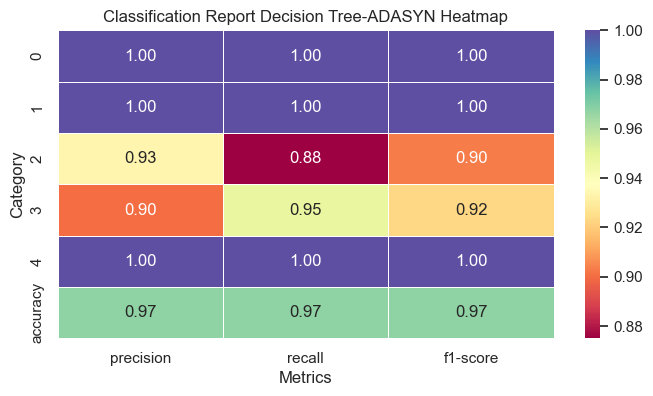

In [23]:
# Dapatkan classification report_adasyn_decTree
report_adasyn_decTree = pd.DataFrame(classification_report(y_test_adasyn, y_predict_adasyn_decTree, output_dict=True)).transpose()
plt.figure(figsize=(8, 4))
sns.heatmap(report_adasyn_decTree.iloc[:-2, :3], annot=True, cmap='Spectral', fmt='.2f', linewidths=.5)
plt.title('Classification Report Decision Tree-ADASYN Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Category')
plt.show()

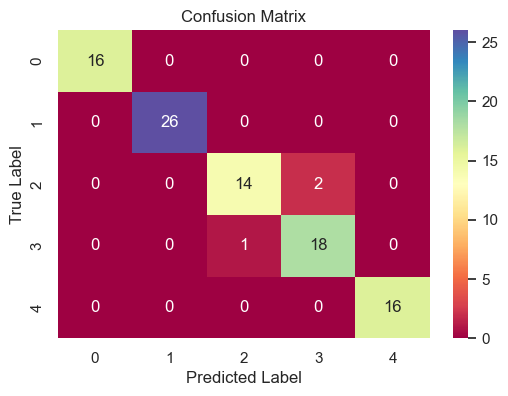

In [24]:
# Visualisasi confusion matrix
matrix_adasyn_decTree = confusion_matrix(y_test_adasyn, y_predict_adasyn_decTree)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_adasyn_decTree, annot=True, fmt='d', cmap='Spectral', cbar=True,
            xticklabels=np.unique(y_test_adasyn),
            yticklabels=np.unique(y_test_adasyn))

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### C] Klasifikasi data hasil resampling gabungan oversampling dengan undersampling menggunakan teknik SMOTE + Tomek Link
</br>C.1.Melakukan resampling menggunakan teknik gabungan oversampling dengan undersampling (SMOTE + Tomek Link)

In [25]:
from imblearn.combine import SMOTETomek
                
# Menerapkan SMOTE untuk oversampling kelas minoritas
smoteTomek = SMOTETomek(random_state=42)
X_smoteTomek, y_smoteTomek = smoteTomek.fit_resample(X, y) 

# Menampilkan jumlah df_drug setelah oversampling
print("Sebelum SMOTE:",  pd.Series(y).value_counts())
print("Setelah SMOTE:",  pd.Series(y_smoteTomek).value_counts())

Sebelum SMOTE: Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64
Setelah SMOTE: Drug
2    91
0    91
1    91
4    89
3    89
Name: count, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_5160\4127463350.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=smoteTomek_counts.index, y=smoteTomek_counts, palette=np.array(color_pal[::-1])[rank], hue=smoteTomek_counts.index)


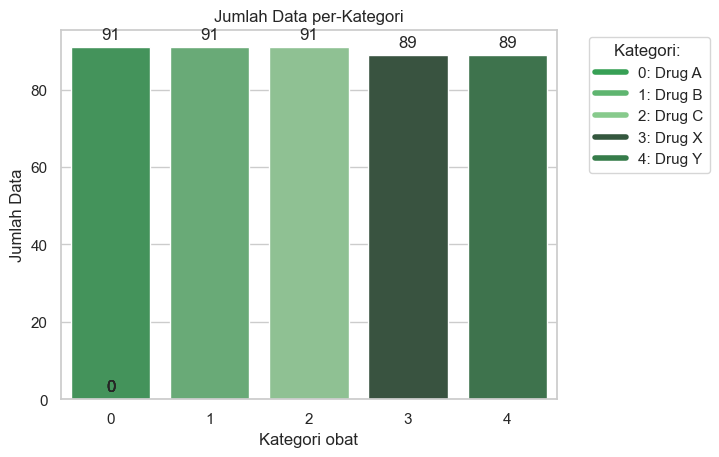

In [26]:
# Visualisasi sesudah resampling SMOTE+Tomek Link
smoteTomek_counts = y_smoteTomek.value_counts().sort_index()

sns.set(style="whitegrid", color_codes=True)
color_pal = sns.color_palette("Greens_d", len(smoteTomek_counts))
rank = smoteTomek_counts.argsort().argsort() 
ax = sns.barplot(x=smoteTomek_counts.index, y=smoteTomek_counts, palette=np.array(color_pal[::-1])[rank], hue=smoteTomek_counts.index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

legend_labels = ['0: Drug A', '1: Drug B', '2: Drug C', '3: Drug X', '4: Drug Y']
lines = [Line2D([0], [0], color=np.array(color_pal[::-1])[rank][i], lw=4) for i in range(len(legend_labels))]
plt.legend(lines, legend_labels, title="Kategori: ", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Jumlah Data per-Kategori')
plt.xlabel('Kategori obat')
plt.ylabel('Jumlah Data')
plt.show()

In [27]:
# Membagi data train dan test
X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_smoteTomek,
                                                                            y_smoteTomek,
                                                                            test_size=0.2,
                                                                            random_state=1)

In [28]:
X_test_smoteTomek

,Age,Sex,BP,Cholesterol,Na_to_K
368,66,0,1,0,10.308256
245,46,0,0,0,10.909858
159,57,0,0,1,9.945000
90,41,1,0,1,15.156000
47,23,1,2,0,31.686000
...,...,...,...,...,...
18,32,0,0,1,25.974000
40,58,0,0,1,14.239000
432,28,0,2,0,12.083547
102,22,1,0,1,28.294000


</br> C.2.Klasifikasi menggunakan metode SVM

In [29]:
# training data menggunakan model SVM
from sklearn.svm import SVC

model_smoteTomek_svm= SVC()
model_smoteTomek_svm.fit(X_train_smoteTomek, y_train_smoteTomek)
y_predict_smoteTomek_svm= model_smoteTomek_svm.predict(X_test_smoteTomek)

In [30]:
# Evaluasi model_smoteTomek_svm
cls_report_svm_smoteTomek = classification_report(y_test_smoteTomek, y_predict_smoteTomek_svm)
print(f'Classification Report Model SVM-SMOTE + Tomek: \n{cls_report_svm_smoteTomek}')

Classification Report Model SVM-SMOTE + Tomek: 
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        17
           1       0.67      1.00      0.80        22
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        15
           4       1.00      0.65      0.79        17

    accuracy                           0.55        91
   macro avg       0.41      0.53      0.43        91
weighted avg       0.42      0.55      0.44        91



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

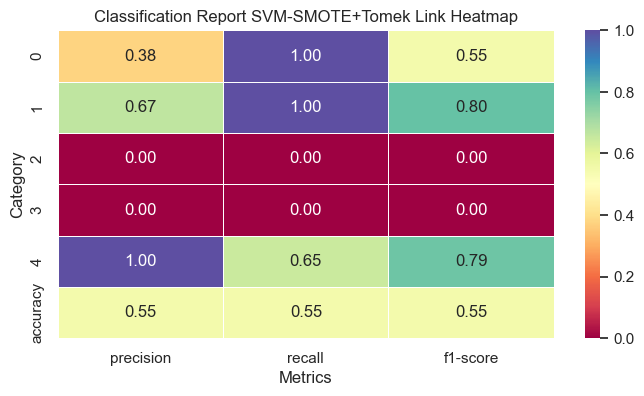

In [31]:
# Dapatkan classification report_smoteTomek_svm
report_smoteTomek_svm = pd.DataFrame(classification_report(y_test_smoteTomek, y_predict_smoteTomek_svm, output_dict=True)).transpose()
plt.figure(figsize=(8, 4))
sns.heatmap(report_smoteTomek_svm.iloc[:-2, :3], annot=True, cmap='Spectral', fmt='.2f', linewidths=.5)
plt.title('Classification Report SVM-SMOTE+Tomek Link Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Category')
plt.show()

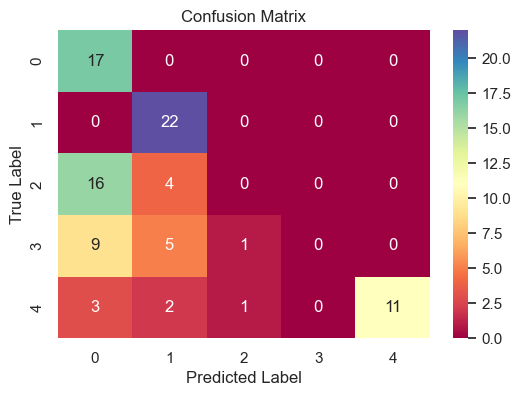

In [32]:
# Visualisasi confusion matrix
matrix_smoteTomek_svm = confusion_matrix(y_test_smoteTomek, y_predict_smoteTomek_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_smoteTomek_svm, annot=True, fmt='d', cmap='Spectral', cbar=True,
            xticklabels=np.unique(y_test_smoteTomek),
            yticklabels=np.unique(y_test_smoteTomek))

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

</br> C.3.Klasifikasi menggunakan metode DecisionTree

In [33]:
# Training data menggunakan Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_smoteTomek_decTree=DecisionTreeClassifier()
model_smoteTomek_decTree.fit(X_train_smoteTomek,y_train_smoteTomek)
y_predict_smoteTomek_decTree=model_smoteTomek_decTree.predict(X_test_smoteTomek)

In [34]:
# Evaluasi model_smoteTomek_decTree
cls_report_decTree_smoteTomek = classification_report(y_test_smoteTomek, y_predict_smoteTomek_decTree)
print(f'Classification Report Model Decision Tree-SMOTE+Tomek Link: \n{cls_report_decTree_smoteTomek}')

Classification Report Model Decision Tree-SMOTE+Tomek Link: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        22
           2       1.00      0.95      0.97        20
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00        17

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



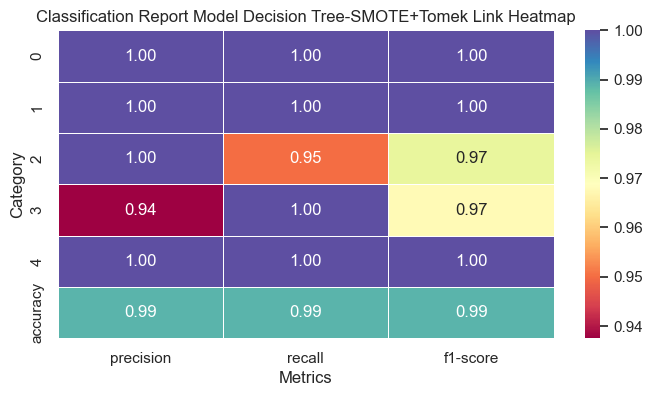

In [35]:
# Visualisasi classification report_smoteTomek_decTree
report_smoteTomek_decTree = pd.DataFrame(classification_report(y_test_smoteTomek, y_predict_smoteTomek_decTree, output_dict=True)).transpose()
plt.figure(figsize=(8, 4))
sns.heatmap(report_smoteTomek_decTree.iloc[:-2, :3], annot=True, cmap='Spectral', fmt='.2f', linewidths=.5)
plt.title('Classification Report Model Decision Tree-SMOTE+Tomek Link Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Category')
plt.show()

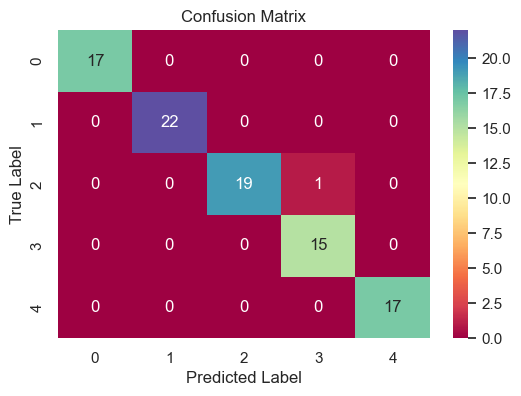

In [36]:
# Hitung confusion matrix
matrix_smoteTomek_decTree = confusion_matrix(y_test_smoteTomek, y_predict_smoteTomek_decTree)

# Visualisasi dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_smoteTomek_decTree, annot=True, fmt='d', cmap='Spectral', cbar=True,
            xticklabels=np.unique(y_test_smoteTomek),
            yticklabels=np.unique(y_test_smoteTomek))

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### D.] Rekap Evaluasi Model
</br>D.1.Mengambil evaluasi accuracy dan macro Avg (precision, recall, dan f1-score)

In [37]:
# Membuat dataframe baru
new_report_adasyn_svm = pd.DataFrame({
    'precision': [report_adasyn_svm.loc['macro avg', 'precision']],
    'recall': [report_adasyn_svm.loc['macro avg', 'recall']],
    'f1-score': [report_adasyn_svm.loc['macro avg', 'f1-score']],
    'accuracy': [report_adasyn_svm.loc['accuracy', 'precision']]
})

new_report_adasyn_decTree = pd.DataFrame({
    'precision': [report_adasyn_decTree.loc['macro avg', 'precision']],
    'recall': [report_adasyn_decTree.loc['macro avg', 'recall']],
    'f1-score': [report_adasyn_decTree.loc['macro avg', 'f1-score']],
    'accuracy': [report_adasyn_decTree.loc['accuracy', 'precision']]
})

new_report_smoteTomek_svm = pd.DataFrame({
    'precision': [report_smoteTomek_svm.loc['macro avg', 'precision']],
    'recall': [report_smoteTomek_svm.loc['macro avg', 'recall']],
    'f1-score': [report_smoteTomek_svm.loc['macro avg', 'f1-score']],
    'accuracy': [report_smoteTomek_svm.loc['accuracy', 'precision']]
})

new_report_smoteTomek_decTree = pd.DataFrame({
    'precision': [report_smoteTomek_decTree.loc['macro avg', 'precision']],
    'recall': [report_smoteTomek_decTree.loc['macro avg', 'recall']],
    'f1-score': [report_smoteTomek_decTree.loc['macro avg', 'f1-score']],
    'accuracy': [report_smoteTomek_decTree.loc['accuracy', 'precision']]
})

D.2.Merekap matrix evaluasi model

In [38]:
report_models = pd.concat([
    new_report_adasyn_svm.assign(model='ADASYN - SVM'),
    new_report_adasyn_decTree.assign(model='ADASYN - DecisionTree'),
    new_report_smoteTomek_svm.assign(model='SMOTE+Tomek Link - SVM'),
    new_report_smoteTomek_decTree.assign(model='SMOTE+Tomek Link - DecisionTree')
])

report_models.set_index(['model'], inplace=True)
report_models

,precision,recall,f1-score,accuracy
model,,,,
ADASYN - SVM,0.497923,0.571053,0.488351,0.602151
ADASYN - DecisionTree,0.966667,0.964474,0.965261,0.967742
SMOTE+Tomek Link - SVM,0.408889,0.529412,0.426820,0.549451
SMOTE+Tomek Link - DecisionTree,0.987500,0.990000,0.988420,0.989011


D.3.Visualisasi haril rekap

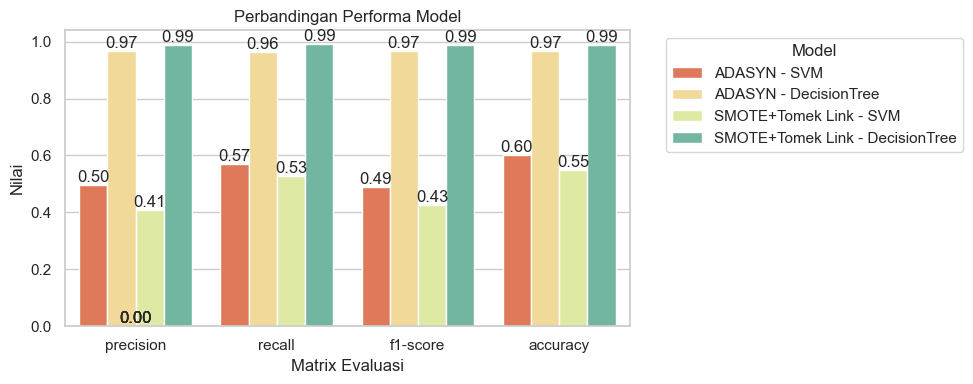

In [39]:
report_model_reset = report_models.reset_index()
melted_report = report_model_reset.melt(id_vars='model', var_name='metric', value_name='value')
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(data=melted_report, x='metric', y='value', hue='model', palette='Spectral')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')

plt.title('Perbandingan Performa Model')
plt.xlabel('Matrix Evaluasi')
plt.ylabel('Nilai')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
